In [1]:

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


c:\Users\Maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Carregar a base
df = pd.read_csv("Base_Dados.csv", encoding="ISO-8859-1")
df = df.rename(columns={'Date': 'ds', 'Preço (USD)': 'y'})
df['ds'] = pd.to_datetime(df['ds'], format='%b %d, %Y')
df.head(20)



,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [3]:
df = df.dropna(subset=['ds'])  # Remove linhas onde a data está vazia


In [4]:
print(df['ds'].max())

2025-05-02 00:00:00


In [5]:
# criando o modelo do Prophet
previsao_prophet = Prophet()

In [6]:
# treinando o modelo com os dados (meu dataframe df)
resultado_do_treinamento = previsao_prophet.fit(df)

00:24:06 - cmdstanpy - INFO - Chain [1] start processing
00:24:12 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# agora quero prever os próximos 30 dias
dias_que_eu_quero_prever = 30
dataframe_com_datas_futuras = previsao_prophet.make_future_dataframe(periods=dias_que_eu_quero_prever)

In [8]:
# agora faço a previsão com base nessas datas
resultado_da_previsao = previsao_prophet.predict(dataframe_com_datas_futuras)

In [9]:
# só ver as colunas dessa previsão pra entender
print(resultado_da_previsao.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [10]:
# agora quero comparar o que o modelo previu com os dados reais que eu tenho

# pego só as colunas de data (ds) e a previsão (yhat)
previsao_simplificada = resultado_da_previsao[['ds', 'yhat']]

# junto com meu dataframe original, pra comparar o valor previsto com o valor real
comparacao = previsao_simplificada.merge(df, on='ds')

print(comparacao)

             ds       yhat      y
0    1987-05-20  17.537317  18.63
1    1987-05-21  17.666876  18.45
2    1987-05-22  17.674914  18.55
3    1987-05-25  17.722530  18.60
4    1987-05-26  17.610725  18.63
...         ...        ...    ...
9626 2025-04-28  88.486731  66.13
9627 2025-04-29  88.412564  64.04
9628 2025-04-30  88.486505  63.37
9629 2025-05-01  88.635506  62.37
9630 2025-05-02  88.677073  61.57

[9631 rows x 3 columns]


In [11]:
# agora vou calcular os erros

# erro absoluto médio
meu_mae = mean_absolute_error(comparacao['y'], comparacao['yhat'])

# raiz do erro quadrático médio
meu_rmse = np.sqrt(mean_squared_error(comparacao['y'], comparacao['yhat']))

# mostrar os resultados
print("Erro médio absoluto (MAE):", round(meu_mae, 2))
print("Raiz do erro quadrático médio (RMSE):", round(meu_rmse, 2))

Erro médio absoluto (MAE): 6.72
Raiz do erro quadrático médio (RMSE): 10.59


In [27]:
#model.plot_components(forecast)


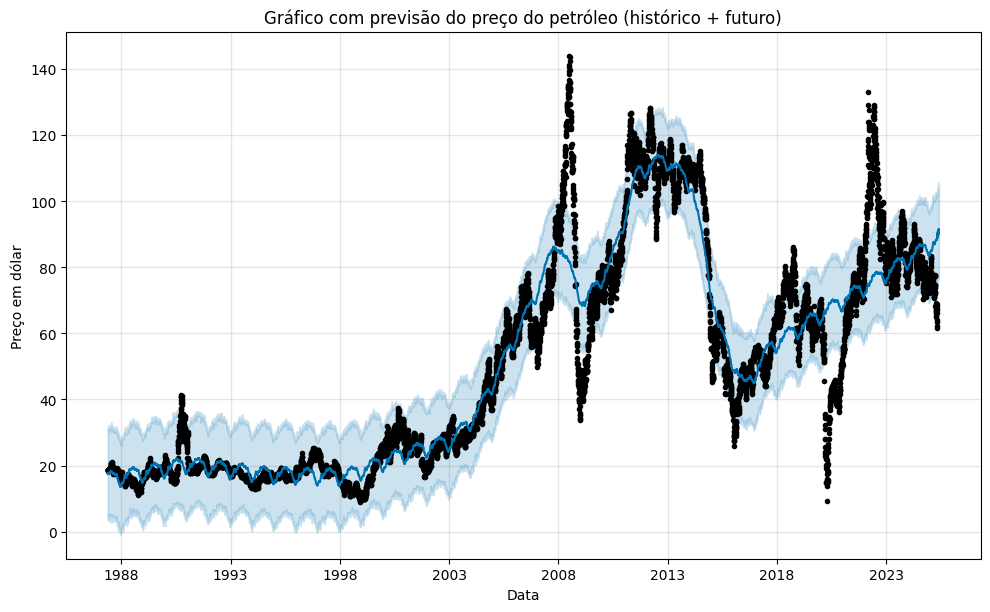

In [12]:
# importando a biblioteca pra fazer gráfico
import matplotlib.pyplot as plt

# criando o gráfico completo da previsão (com os dados históricos e os próximos 30 dias)
# usando o método plot do próprio Prophet

grafico_completo = previsao_prophet.plot(resultado_da_previsao)

# colocando título e eixos pra deixar mais bonito
plt.title("Gráfico com previsão do preço do petróleo (histórico + futuro)")
plt.xlabel("Data")
plt.ylabel("Preço em dólar")
plt.grid(True)

# mostrar o gráfico
plt.show()


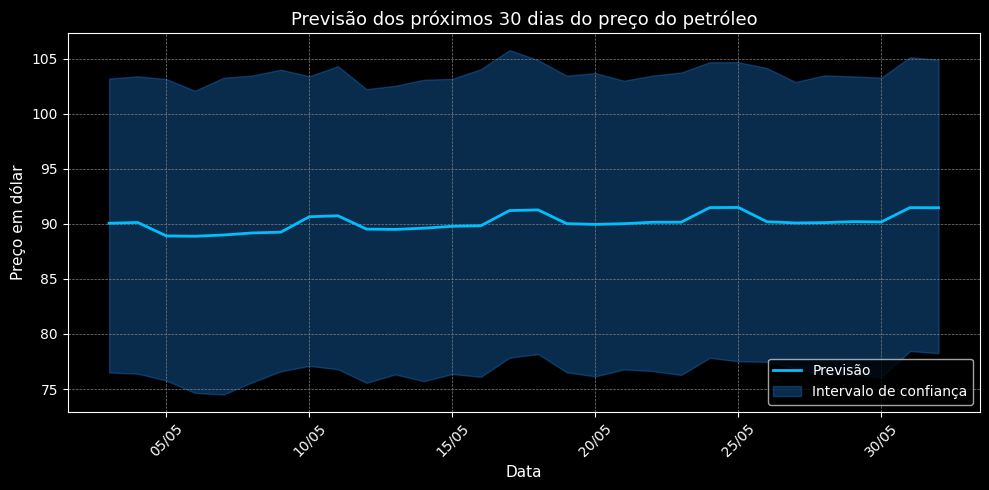

In [13]:
# Última data real
ultima_data_real = df['ds'].max()

# Apenas previsão futura
apenas_previsao_futura = resultado_da_previsao[resultado_da_previsao['ds'] > ultima_data_real]

# Estilo escuro para combinar com a paleta de cores do dashboard
plt.style.use('dark_background')

# Criar figura
plt.figure(figsize=(10, 5))

# Linha da previsão (azul vibrante)
plt.plot(apenas_previsao_futura['ds'], 
         apenas_previsao_futura['yhat'], 
         label='Previsão', 
         color='#00BFFF',  # azul vibrante
         linewidth=2)

# Intervalo de confiança (azul mais suave)
plt.fill_between(apenas_previsao_futura['ds'],
                 apenas_previsao_futura['yhat_lower'],
                 apenas_previsao_futura['yhat_upper'],
                 color='#1E90FF', alpha=0.3, label='Intervalo de confiança')

# Eixo de datas mais legível
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.xticks(rotation=45)

# Títulos e rótulos
plt.title("Previsão dos próximos 30 dias do preço do petróleo", fontsize=13)
plt.xlabel("Data", fontsize=11)
plt.ylabel("Preço em dólar", fontsize=11)

# Grid mais sutil e elegante
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Exibir
plt.show()



In [ ]:

apenas_previsao_futura[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop=True).head(30)


,ds,yhat,yhat_lower,yhat_upper
0,2025-05-03,90.051730,76.506661,103.189343
1,2025-05-04,90.124561,76.395102,103.393236
2,2025-05-05,88.902847,75.773821,103.142551
3,2025-05-06,88.872576,74.649434,102.080669
4,2025-05-07,88.986862,74.507371,103.260991
5,2025-05-08,89.171663,75.614608,103.462951
6,2025-05-09,89.243612,76.607397,103.996548
7,2025-05-10,90.642504,77.101811,103.404207
8,2025-05-11,90.732848,76.800510,104.308016
9,2025-05-12,89.521523,75.564987,102.229816
